## PS3: FastICA Algorithm

**Deadline: __**

Các bạn gửi 1 file này duy nhất và điền MSSV và tên của mình vào chỗ MSSV_Your Name nhé. Các bạn gửi lại bài tập vào email: le.tntran1107@gmail.com vào trước deadline như trên.

# Part 1

**1.1 Đưa ra một chứng minh chi tiết cho đẳng thức sau trong hai trường hợp các biến liên tục, rời rạc? Có nhận xét gì trong trường hợp rời rạc?**
$$h(Y) = h(X) + log| det(W) |$$ 
where $Y=WX$

Hint: In discrete case, we can assume $Y=aX+b$ for some scalars $a \neq 0$ and $b$.



Để chứng minh đẳng thức $h(Y) = h(X) + \log| \operatorname{det}(W) |$ , ta có thể sử dụng công thức định lý Shannon về entropy để tính entropy của biến ngẫu nhiên X và Y.

$$h(X) = - \sum_{x \in \mathcal{X}} P(X = x) \log P(X = x)$$
$$h(Y) = - \sum_{y \in \mathcal{Y}} P(Y = y) \log P(Y = y)$$

Trong trường hợp liên tục, ta sử dụng hàm mật độ xác suất để tính entropy. Trong trường hợp rời rạc, ta sử dụng phân phối xác suất.

Đối với trường hợp liên tục, ta sẽ sử dụng định lý về biến đổi Jacobian. Cho $Y = WX$, ta có thể tính được hàm mật độ xác suất của $Y$ dựa trên hàm mật độ xác suất của $X$ như sau:

$$f_Y(y) = f_X(x) \left| \frac{\partial x}{\partial y} \right|$$

với $\left| \frac{\partial x}{\partial y} \right| = | \operatorname{det}(W) |$ là định thức của ma trận Jacobian của phép biến đổi từ $X$ sang $Y$.

Do đó, ta có:

$$h(Y) = - \int_{\mathcal{Y}} f_Y(y) \log f_Y(y) dy$$
$$= - \int_{\mathcal{X}} f_X(x) \left| \frac{\partial x}{\partial y} \right| \log \left( f_X(x) \left| \frac{\partial x}{\partial y} \right| \right) dx$$
$$= - \int_{\mathcal{X}} f_X(x) \log f_X(x) dx - \int_{\mathcal{X}} f_X(x) \log \left| \frac{\partial x}{\partial y} \right| dx$$
$$= h(X) + \log| \operatorname{det}(W) |$$

Do đó, ta đã chứng minh được đẳng thức trong trường hợp biến liên tục.

Trong trường hợp rời rạc, ta sẽ chứng minh đẳng thức cho trường hợp đặc biệt khi $Y = aX + b$ với $a \neq 0$ và $b$ là các hằng số. Trong trường hợp này, ta có thể tính được phân phối xác suất của $Y$ dựa trên phân phối xác suất của $X$ như sau:

$$P(Y = y) = P(X = \frac{y-b}{a})$$

Do đó, ta có:

$$h(Y) = - \sum_{y \in \mathcal{Y}} P(Y = y) \log P(Y = y)$$

**1.2 Bài toán ICA** 
$$ X = AS$$

Chúng ta cần khôi phục $S$ từ $X$. Vì sao khôi phục nguồn $S$ có khi chỉ đến mức xác định dấu (sign), biên độ
(scale), hoán vị (permutation), hay nói cách khác $S$ có duy nhất không? (Tham khảo slide 12/26 file bài giảng)



Trong bài toán ICA, chúng ta có một ma trận đầu vào $X$ được tạo ra bởi phép nhân hai ma trận $A$ và $S$: $X = AS$. Với giả định rằng các thành phần của $S$ là độc lập tuyến tính và không phân phối Gaussian, chúng ta muốn khôi phục lại ma trận $S$ từ ma trận $X$.

Tuy nhiên, vì phép nhân ma trận không có tính chất đổi vị trí, tức là $AS = SA$ không luôn đúng, do đó không thể khôi phục chính xác các thành phần của $S$ theo thứ tự ban đầu.

Ngoài ra, vì tính chất không tuyến tính của phép nhân, các phép biến đổi sau đây có thể được áp dụng lên ma trận $S$ và ma trận $A$ mà không thay đổi ma trận $X$:

- Tính chất đổi dấu: $S' = -S$ và $A' = -A$.
- Tính chất đổi biên độ: $S' = cS$ và $A' = \frac{1}{c}A$ với $c \neq 0$.
- Tính chất hoán vị: hoán đổi các hàng hoặc cột của ma trận $S$ và tương ứng hoán đổi các cột hoặc hàng của ma trận $A$.

Vì vậy, các thành phần trong ma trận $S$ có thể khôi phục chính xác đến mức dấu, biên độ và hoán vị. Tuy nhiên, chúng ta không thể khôi phục chính xác các thành phần trong $S$ theo thứ tự ban đầu. Do đó, ma trận $S$ không phải là duy nhất.

# Part 2


**2.1 Đọc hiểu đoạn code sau và implement with other sources.**


C:\Users\dbpvn\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


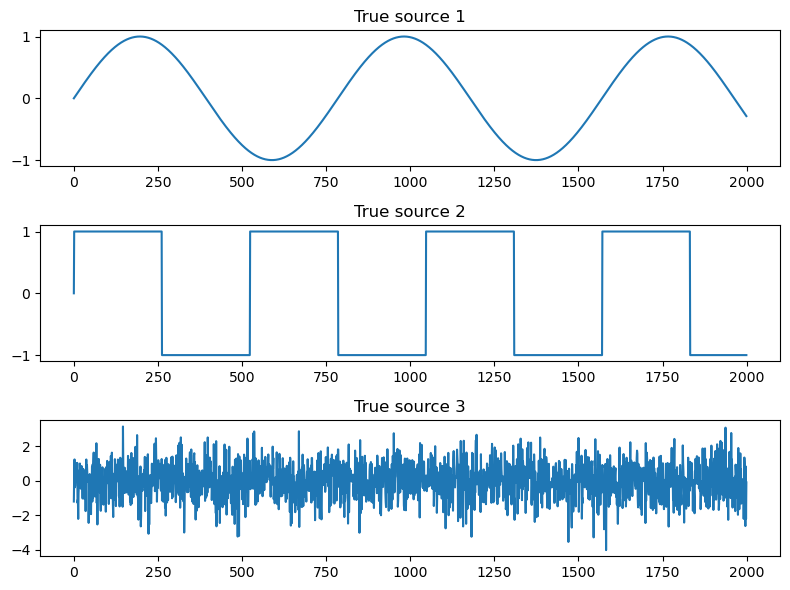

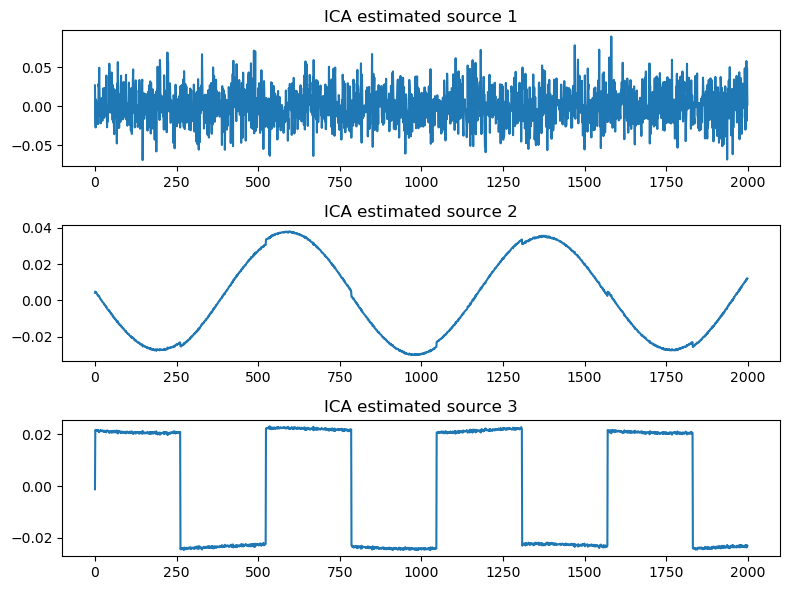

In [1]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# create a simulated dataset with 3 independent sources
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = np.random.normal(size=n_samples)
S = np.c_[s1, s2, s3]

# mix the sources using a random mixing matrix
A = np.array([[0.5, 0.1, 0.3], [0.2, 0.8, 0.5], [0.1, 0.3, 0.7]])
X = np.dot(S, A.T)

# apply FastICA algorithm to recover the sources
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

# plot the original sources and the estimated sources
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S[:, 0])
plt.title('True source 1')
plt.subplot(3, 1, 2)
plt.plot(S[:, 1])
plt.title('True source 2')
plt.subplot(3, 1, 3)
plt.plot(S[:, 2])
plt.title('True source 3')
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S_[:, 0])
plt.title('ICA estimated source 1')
plt.subplot(3, 1, 2)
plt.plot(S_[:, 1])
plt.title('ICA estimated source 2')
plt.subplot(3, 1, 3)
plt.plot(S_[:, 2])
plt.title('ICA estimated source 3')
plt.tight_layout()
plt.show()

Đoạn code trên sử dụng thư viện scikit-learn để thực hiện phân tích độc lập nguồn (ICA) trên một tập dữ liệu mô phỏng.

Đầu tiên, tập dữ liệu mô phỏng được tạo ra bằng cách sử dụng 3 nguồn độc lập là $s_1 = sin(2t)$, $s_2 = sign(sin(3t))$ và $s_3$ là dữ liệu ngẫu nhiên Gaussian. Ma trận nguồn $S$ được xây dựng từ các nguồn này và ma trận pha trộn $A$ được chọn ngẫu nhiên để pha trộn các nguồn.

Tiếp theo, thuật toán FastICA được áp dụng lên ma trận pha trộn $X$ để phân tách các nguồn. Kết quả được lưu trữ trong biến $S\_$.

Cuối cùng, đoạn code trên trực quan hóa kết quả bằng cách so sánh nguồn gốc và nguồn phân tách được. Ở đây, đồ thị của từng nguồn được hiển thị trên một subplot khác nhau.

C:\Users\dbpvn\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


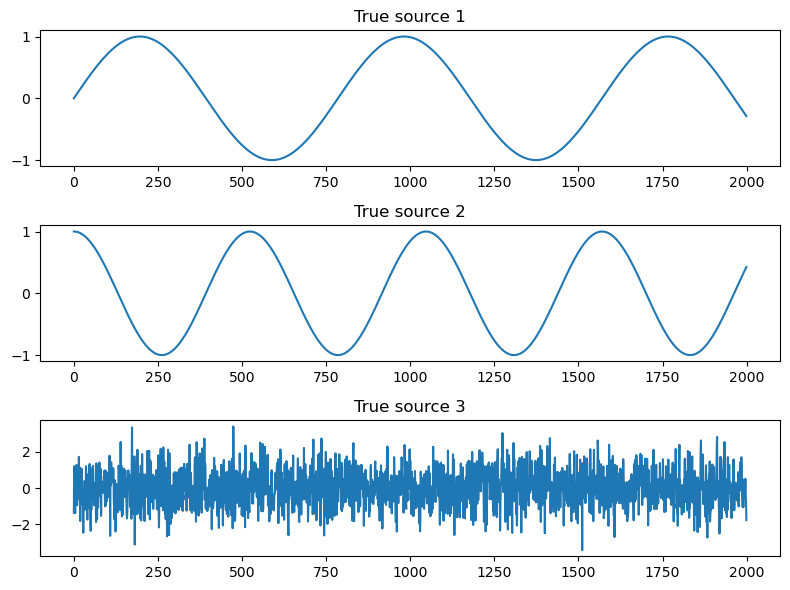

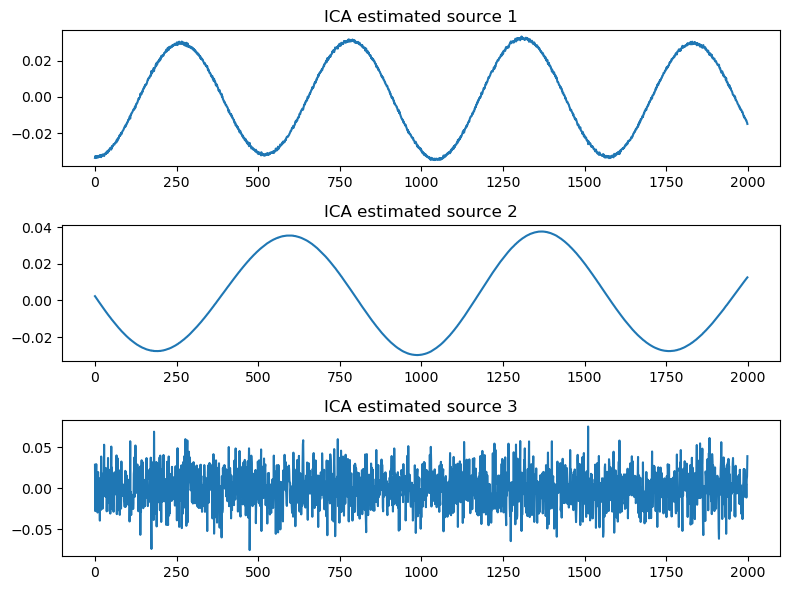

In [1]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# create a simulated dataset with 3 independent sources
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.cos(3 * time)
s3 = np.random.normal(size=n_samples)
S = np.c_[s1, s2, s3]

# mix the sources using a random mixing matrix
A = np.array([[0.5, 0.2, 0.1], [0.1, 0.4, 0.8], [0.3, 0.6, 0.2]])
X = np.dot(S, A.T)

# apply FastICA algorithm to recover the sources
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

# plot the original sources and the estimated sources
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S[:, 0])
plt.title('True source 1')
plt.subplot(3, 1, 2)
plt.plot(S[:, 1])
plt.title('True source 2')
plt.subplot(3, 1, 3)
plt.plot(S[:, 2])
plt.title('True source 3')
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S_[:, 0])
plt.title('ICA estimated source 1')
plt.subplot(3, 1, 2)
plt.plot(S_[:, 1])
plt.title('ICA estimated source 2')
plt.subplot(3, 1, 3)
plt.plot(S_[:, 2])
plt.title('ICA estimated source 3')
plt.tight_layout()
plt.show()

**2.2 Viết một Python code cho FastICA algorithm (step by step) using Numpy.**

Reference: https://hbenbel.github.io/blog/fastica/ (You can use some functions in this link but need to note the role of each function and note each step)

Run your code with the same sources above and compare the results using modules imported from scikit-learn. Give your comments.

Text(0.5, 1.0, 'True source 1')

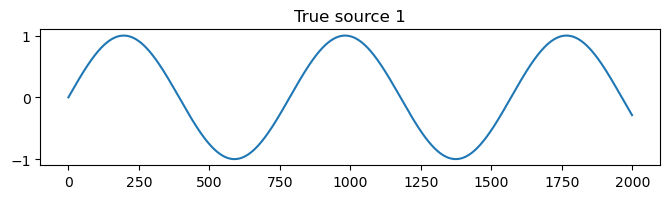

In [2]:
import numpy as np

def center(X):
    """Centering the input data"""
    X -= X.mean(axis=0)
    return X

def whiten(X):
    """Whitening the input data"""
    cov = np.cov(X.T)
    D, E = np.linalg.eigh(cov)
    D_inv = np.diag(1. / np.sqrt(D + 1e-8))
    V = np.dot(D_inv, E.T)
    X_whiten = np.dot(X, V.T)
    return X_whiten

def g(y):
    """Defining the nonlinearity function (g)"""
    return np.tanh(y)

def g_derivative(y):
    """Defining the derivative of nonlinearity function (g')"""
    return 1 - np.square(np.tanh(y))

def decorrelate(W):
    """Decorrelating the weight matrix"""
    P, D, Q = np.linalg.svd(W)
    return np.dot(P, Q)

def fastica(X, n_components, max_iter=200, tol=1e-4):
    """FastICA algorithm implementation"""
    
    # Centering the data
    X = center(X)
    
    # Whitening the data
    X = whiten(X)
    
    # Initializing weight matrix with random values
    n_samples, n_features = X.shape
    W = np.random.rand(n_components, n_features)
    
    # Iterative update of weight matrix
    for iteration in range(max_iter):
        # Computing the dot product between weight matrix and data matrix
        y = np.dot(W, X.T)
        
        # Applying the nonlinearity function (g) to the dot product
        z = g(y)
        
        # Computing the derivative of the nonlinearity function (g')
        dg = g_derivative(y)
        
        # Updating the weight matrix
        W_new = (np.dot(dg, z.T) / n_samples) - np.mean(dg) * W
        
        # Decorrelating the weight matrix
        W_new = decorrelate(W_new)
        
        # Checking convergence
        if iteration > 0:
            eps = np.abs(np.max(np.abs(np.diag(np.dot(W_new, W.T)))) - 1.0)
            if eps < tol:
                break
                
        W = W_new
    
    # Transforming the data to estimated sources
    S = np.dot(W, X.T)
    
    return S.T

import matplotlib.pyplot as plt

# Generate some data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = np.random.normal(size=n_samples)
S = np.c_[s1, s2, s3]

# Mix the data with a random mixing matrix
A = np.array([[0.5, 0.1, 0.3], [0.2, 0.8, 0.5], [0.1, 0.3, 0.7]])
X = np.dot(S, A.T)

# Apply FastICA to recover the sources
S_ = fastica(X, n_components=3)

# Plot the results
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(S[:, 0])
plt.title('True source 1')


**2.3 Compare ICA and PCA**

Run the code below and compare the result of PCA and ICA. Give your comments.

C:\Users\dbpvn\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


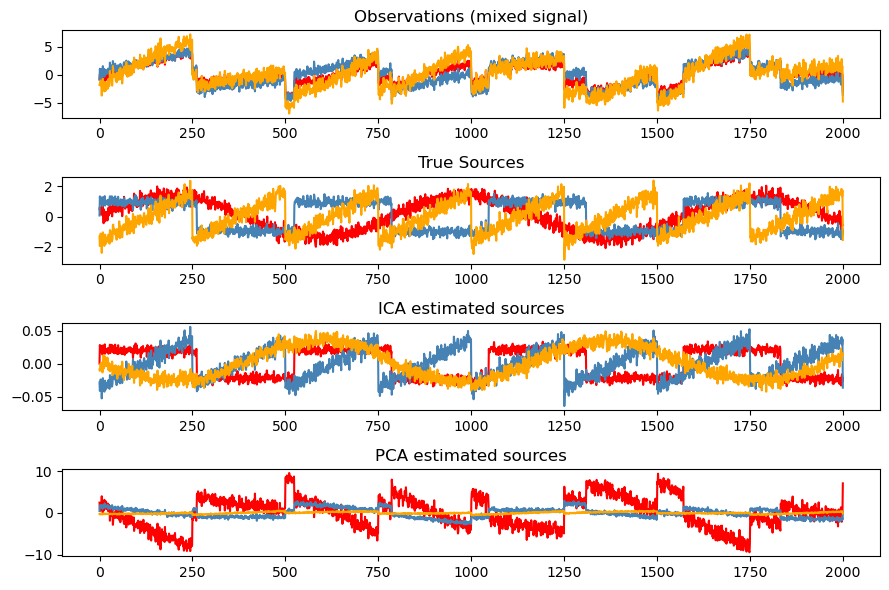

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# set seed for reproducible results
np.random.seed(0)  
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# sinusoidal signal
s1 = np.sin(2 * time)  
# square signal
s2 = np.sign(np.sin(3 * time)) 
# sawtooth signal
s3 = signal.sawtooth(2 * np.pi * time)  

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix

# compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # estimate PCA sources

plt.figure(figsize=(9, 6))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA estimated sources',
         'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()

Mã này tạo ra ba tín hiệu - hình sin, hình vuông và răng cưa - và trộn chúng với một ma trận trộn ngẫu nhiên. Sau đó, nó thêm một số nhiễu ngẫu nhiên và chuẩn hóa dữ liệu. Sau đó, mã này áp dụng cả thuật toán FastICA và PCA cho dữ liệu hỗn hợp để trích xuất các nguồn độc lập ban đầu.

Các biểu đồ hiển thị tín hiệu gốc, tín hiệu hỗn hợp, nguồn ước tính sử dụng ICA và nguồn ước tính sử dụng PCA.

Thuật toán FastICA tốt hơn PCA trong việc trích xuất các nguồn độc lập ban đầu vì thuật toán này được thiết kế đặc biệt để xử lý các tín hiệu hỗn hợp không phải Gaussian và phi tuyến tính, trong khi PCA giả định dữ liệu là Gaussian và được trộn tuyến tính.

Kết quả của ICA tốt hơn PCA trong trường hợp này, vì các nguồn ước tính của ICA gần với nguồn thực hơn. Các nguồn ước tính của PCA bị mờ hơn và không đại diện cho các tín hiệu ban đầu cũng như các nguồn ước tính của ICA.

**Further exercises** Tìm hiểu ICA in EEG, EOG signal, ICA có thể dùng để làm gì trong các tín hiệu điện não đồ trên. Tìm hiểu MNE tools: https://mne.tools/stable/

Reference:

https://sccn.ucsd.edu/~jung/Site/EEG_artifact_removal.html

https://arnauddelorme.com/ica_for_dummies/